In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from typing import List
from sklearn.metrics import f1_score
import csv
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# EDA



In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
veriler  = pd.read_csv('drive/MyDrive/VeriSeti/Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Values.csv')
sonuclar = pd.read_csv('drive/MyDrive/VeriSeti/Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Labels.csv')
subm = pd.read_csv('drive/MyDrive/VeriSeti/Richters_Predictor_Modeling_Earthquake_Damage_-_Test_Values.csv')
subm['damage_grade'] = -1
fullData =pd.concat([veriler,sonuclar],axis=1)
veri = pd.concat([veriler,sonuclar.drop('building_id',axis=1,)],axis=1)

catData=pd.concat([veriler.iloc[:,8:15],veriler['legal_ownership_status']],axis=1)
cd = catData.iloc[:,:].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


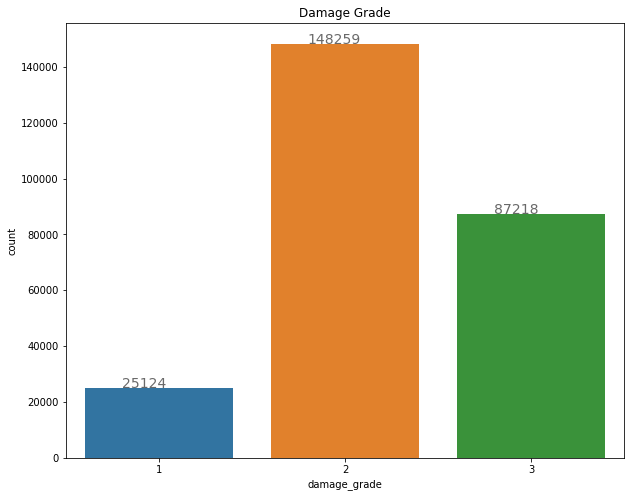

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.countplot("damage_grade",data=fullData)
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()+3, \
            str(round((i.get_height()), 2)), fontsize=14, color='dimgrey')
plt.title("Damage Grade")
plt.show()  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

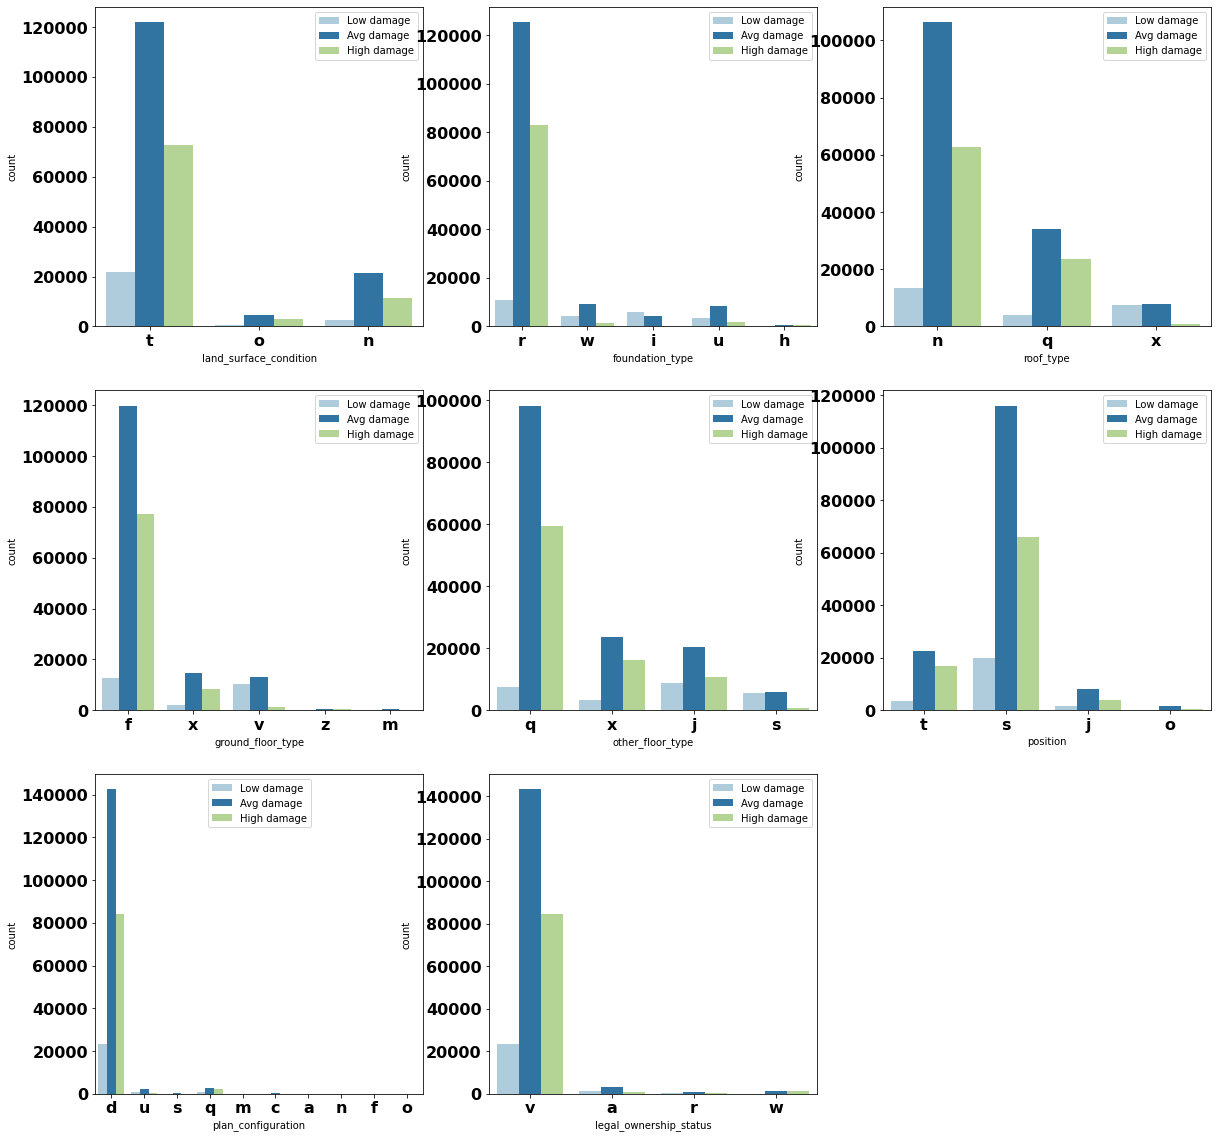

In [ ]:
cat_cols=fullData.select_dtypes(include="object")
font={'weight' : 'bold',
        'size': 16}       
q=1
plt.figure(figsize=(20,20))
for j in cat_cols:
    plt.subplot(3,3,q)
    ax=sns.countplot(fullData[j].dropna(),palette="Paired",hue=fullData["damage_grade"])
    plt.xticks(**font)
    plt.yticks(**font)
    plt.xlabel(j)
    plt.legend(["Low damage","Avg damage","High damage"])
    q+=1
plt.show()

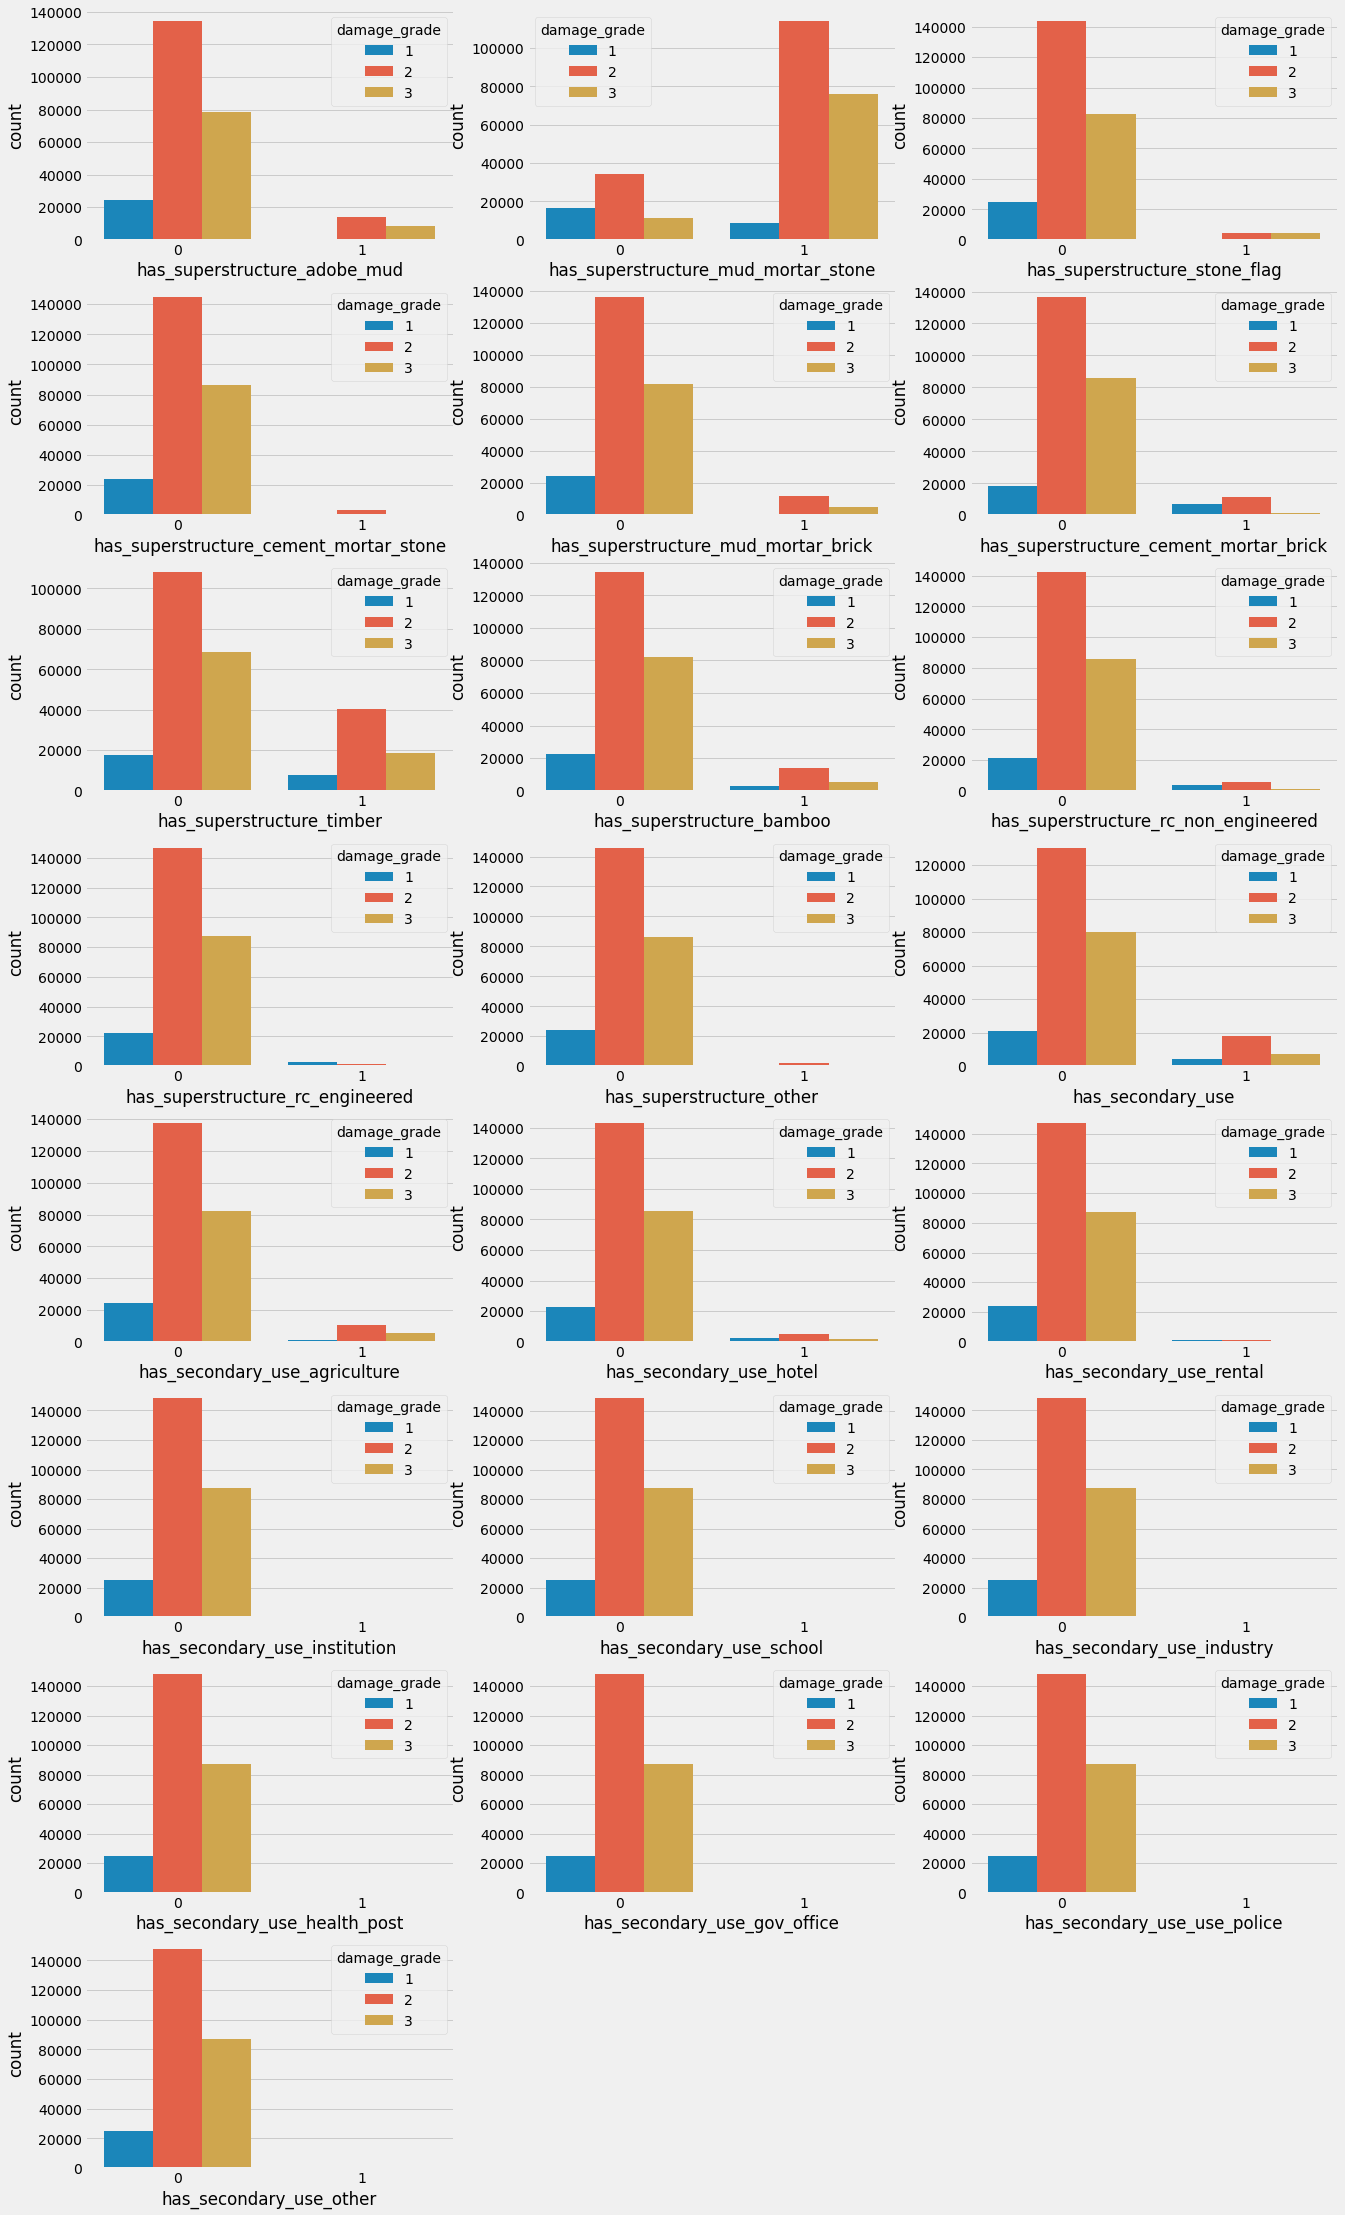

In [ ]:
bin_cols = fullData.columns[fullData.columns.str.startswith('has')]

def countPlot(bin_cols):
  plt.rcParams['font.size'] = 18
  plt.style.use('fivethirtyeight')
  fig = plt.figure(figsize=(20,37))
  for i,txt in enumerate(bin_cols):
    ax = fig.add_subplot(8,3,i+1)
    sns.countplot(x=fullData[txt], ax=ax, hue=fullData['damage_grade'])
  plt.show()
countPlot(bin_cols)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
for i in range(8):
    le = LabelEncoder()
    cd[:,i]=le.fit_transform(cd[:,i])

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
encodedDatas= pd.DataFrame(ohe.fit_transform(catData).toarray())

finalData = pd.concat([veriler.iloc[:,1:8],veriler.iloc[:,15:26],veriler.iloc[:,27:],encodedDatas,sonuclar.drop('building_id',axis=1,)],axis=1)
finalData = finalData.drop("damage_grade",axis=1)
finalData

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,28,29,30,31,32,33,34,35,36,37
0,6,487,12198,2,30,6,5,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,8,900,2812,2,10,8,7,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,21,363,8973,2,10,5,5,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,22,418,10694,2,10,6,5,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,11,131,1488,3,30,8,9,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
260597,17,715,2060,2,0,6,5,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
260598,17,51,8163,3,55,6,7,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
260599,26,39,1851,2,10,14,6,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Feature Generating

In [ ]:
cnt_floor_age = finalData.iloc[:,3]/(finalData.iloc[:,4]+0.1)
cnt_floor_area = finalData.iloc[:,3]/finalData.iloc[:,5]
cnt_floor_height =finalData.iloc[:,3]/finalData.iloc[:,6]
area_per_age = finalData.iloc[:,5]/(finalData.iloc[i,4]+0.1)
height_per_age = finalData.iloc[:,6]/(finalData.iloc[i,4]+0.1)
area_per_height = finalData.iloc[:,5]/finalData.iloc[i,6]
cnt_fam_floor =finalData.iloc[:,18]/finalData.iloc[i,3]
cnt_fam_area  = finalData.iloc[:,18]/finalData.iloc[i,5]
cnt_fam_height =finalData.iloc[:,18]/finalData.iloc[i,6]
names = ["cnt_floor_age","cnt_floor_area","cnt_floor_height","area_per_age","height_per_age","area_per_height","cnt_fam_floor","cnt_fam_area","cnt_fam_height"]
generatedData=pd.DataFrame([cnt_floor_age,cnt_floor_area,cnt_floor_height,area_per_age,height_per_age,area_per_height,cnt_fam_floor,cnt_fam_area,cnt_fam_height],index=names,dtype=float)
generatedData=generatedData.T


In [ ]:
finalData["geo_level_3_id"].unique()

array([12198,  2812,  8973, ...,  3152,  5276,  3085])

In [ ]:
finalData= pd.concat([finalData,generatedData],axis=1)
finalData.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,37,cnt_floor_age,cnt_floor_area,cnt_floor_height,area_per_age,height_per_age,area_per_height,cnt_fam_floor,cnt_fam_area,cnt_fam_height
0,6,487,12198,2,30,6,5,1,1,0,...,0.0,0.066445,0.333333,0.400000,60.0,50.0,1.000000,0.5,0.125,0.166667
1,8,900,2812,2,10,8,7,0,1,0,...,0.0,0.198020,0.250000,0.285714,80.0,70.0,1.333333,0.5,0.125,0.166667
2,21,363,8973,2,10,5,5,0,1,0,...,0.0,0.198020,0.400000,0.400000,50.0,50.0,0.833333,0.5,0.125,0.166667
3,22,418,10694,2,10,6,5,0,1,0,...,0.0,0.198020,0.333333,0.400000,60.0,50.0,1.000000,0.5,0.125,0.166667
4,11,131,1488,3,30,8,9,1,0,0,...,0.0,0.099668,0.375000,0.333333,80.0,90.0,1.333333,0.5,0.125,0.166667


In [ ]:
damage1 = {}
damage2 = {}
damage3 = {}
fullData
for i,j in (finalData['geo_level_1_id'].value_counts()).iteritems():
    
    n1 = len(fullData[fullData['damage_grade']==1][fullData['geo_level_1_id']==i])
    n2 = len(fullData[fullData['damage_grade']==2][fullData['geo_level_1_id']==i])
    n3 = len(fullData[fullData['damage_grade']==3][fullData['geo_level_1_id']==i])

    damage1[i] = n1/j
    damage2[i] = n2/j
    damage3[i] = n3/j
list1 = []
list2 = []
list3 = []

for i in fullData['geo_level_1_id']:
    list1.append(damage1.get(i))
    list2.append(damage2.get(i))
    list3.append(damage3.get(i))

finalData['prob1_geo1'] = list1
finalData['prob2_geo1'] = list2
finalData['prob3_geo1'] = list3

In [ ]:
damage1 = {}
damage2 = {}
damage3 = {}

for i,j in (fullData['geo_level_2_id'].value_counts()).iteritems():
    
    n1 = len(fullData[fullData['damage_grade']==1][fullData['geo_level_2_id']==i])
    n2 = len(fullData[fullData['damage_grade']==2][fullData['geo_level_2_id']==i])
    n3 = len(fullData[fullData['damage_grade']==3][fullData['geo_level_2_id']==i])

    damage1[i] = n1/j
    damage2[i] = n2/j
    damage3[i] = n3/j
list1 = []
list2 = []
list3 = []

for i in fullData['geo_level_2_id']:
    list1.append(damage1.get(i))
    list2.append(damage2.get(i))
    list3.append(damage3.get(i))

finalData['prob1_geo2'] = list1
finalData['prob2_geo2'] = list2
finalData['prob3_geo2'] = list3

In [ ]:
damage1 = {}
damage2 = {}
damage3 = {}

for i,j in (fullData['geo_level_3_id'].value_counts()).iteritems():
    
    n1 = len(fullData[fullData['damage_grade']==1][fullData['geo_level_3_id']==i])
    n2 = len(fullData[fullData['damage_grade']==2][fullData['geo_level_3_id']==i])
    n3 = len(fullData[fullData['damage_grade']==3][fullData['geo_level_3_id']==i])

    damage1[i] = n1/j
    damage2[i] = n2/j
    damage3[i] = n3/j
list1 = []
list2 = []
list3 = []

for i in fullData['geo_level_3_id']:
    list1.append(damage1.get(i))
    list2.append(damage2.get(i))
    list3.append(damage3.get(i))

finalData['prob1_geo3'] = list1
finalData['prob2_geo3'] = list2
finalData['prob3_geo3'] = list3

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(finalData,sonuclar.drop('building_id',axis=1,), test_size=0.2, shuffle=True);

# **DECISIONTREE**


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([[ 4264,  2933,   423],
       [ 3089, 32277,  9050],
       [  473,  9053, 16619]])

In [ ]:
print("DecisionTree TEST Score:",f1_score(y_test, y_pred,average="micro"))

DecisionTree TEST Score: 0.6799606042388816


In [ ]:
from sklearn.metrics import f1_score
print(" F1_micro TEST Score: ",f1_score(y_test,y_pred,average="micro"))

 F1_micro TEST Score:  0.6799606042388816


# **XGBOOST**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
xgbModel = xgb.XGBClassifier()
xgbModel.fit(x_train,y_train)
y_pred = xgbModel.predict(x_test)

In [ ]:
print(" XGB TEST Score: ",f1_score(y_test,y_pred,average="micro"))

 F1_micro TEST Score:  0.7571021092081196


# **RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()


In [ ]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [ ]:
print("RandomForest TEST Score:",f1_score(y_test,y_pred,average="micro"))

RandomForest TEST Score: 0.7434415011319886


# **LightGBM**

In [ ]:
import lightgbm as ltb
model = ltb.LGBMClassifier()

In [ ]:
model = ltb.LGBMClassifier(
        objective= "multiclass",
        num_class=3,
        metric = "multi_error",
        boosting= 'gbdt',
        max_depth = -1,
        num_leaves = 30,
        learning_rate = 0.1,
        feature_fraction = 0.5,
        min_sum_hessian_in_leaf = 0.1,
        max_bin=8192,
        verbosity = 1,
        num_threads=6
        )

In [ ]:
model.fit(finalData,sonuclar.drop('building_id',axis=1,))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting='gbdt', feature_fraction=0.5, max_bin=8192,
               metric='multi_error', min_sum_hessian_in_leaf=0.1, num_class=3,
               num_leaves=30, num_threads=6, objective='multiclass',
               verbosity=1)

In [ ]:
y_pred=model.predict(x_test)
print("LGBM TEST Score:",f1_score(y_test,y_pred,average="micro"))

LGBM TEST Score: 0.765383748115973


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print("KNN TEST Score:",f1_score(y_test,y_pred,average="micro"))

KNN TEST Score: 0.6974072984484722


# MultiLayerPerceptron

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)  
X_train = scaler.transform(x_train)  
X_test = scaler.transform(x_test)


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("MLP TEST Score:",f1_score(y_test,y_pred,average="micro"))

MLP TEST Score: 0.7538788196620663


# **HyperParameter Optimization for XGBOOST**

In [ ]:
parameter ={
    "booster" : ["gbtree","gblinear","dart"],
    "learning_rate":[0.1,0.05,0.030,0.025],
    "max_depth":[9,10,11,13,15],
    "min_child_weight":[7,8,9,6,10,],
    "gamma": [0.6,0.7,0.8],
    "colsample_bytree":[0.9,0.8,0.7],
    "n_estimators":[120],
    "reg_alpha":[2,0.5,3,1]
}

In [ ]:
xgbModel = xgb.XGBClassifier()

In [ ]:
random_search = RandomizedSearchCV(xgbModel,param_distributions=parameter,n_iter=5,scoring="f1_micro",n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'colsample_bytree': [0.9, 0.8, 0.7],
                                        'gamma': [0.6, 0.7, 0.8],
                                        'learning_rate': [0.1, 0.05, 0.03,
                                                          0.025],
                                        'max_depth': [9, 10, 11, 13, 15],
                                        'min_child_weight': [7, 8, 9, 6, 10],
                                        'n_estimators': [120],
                                        'reg_alpha': [2, 0.5, 3, 1]},
                   scoring='f1_micro', verbose=3)

In [ ]:
random_search.best_estimator_

XGBClassifier(booster='dart', colsample_bytree=0.7, gamma=0.7,
              learning_rate=0.05, max_depth=10, min_child_weight=9,
              n_estimators=120, objective='multi:softprob', reg_alpha=3)

In [ ]:
random_search.best_score_

0.7494225479560096

In [ ]:
finalModel = xgb.XGBClassifier(booster="dart",
                               colsample_bytree=0.5,
                               gamma=0.7, max_depth=9,
                               min_child_weight=6,
              n_estimators=120,
               objective='multi:softprob', reg_alpha=1)

In [ ]:
finalModel.fit(x_train,y_train)
y_pred = finalModel.predict(x_test)

In [ ]:
print("XGBoost TEST Score:",f1_score(y_test,y_pred,average="micro"))

XGBoost TEST Score: 0.7636510149524821


# HyperParameter Optimization for **RANDOMFOREST**

In [ ]:
parameter ={
  "n_estimators":[550,500,450],
  "criterion":["gini","entropy"],
  "max_depth":[60,70,30,40,50],
  "max_features":["sqrt"],
  "min_samples_split":[8,10,12,6],
  "min_samples_leaf":[2,3,1,4]

}


In [ ]:
randomSearcher = RandomizedSearchCV(clf,param_distributions=parameter,n_iter=5,scoring="f1_micro",n_jobs=-1,cv=5,verbose=3)

In [ ]:
randomSearcher.fit(x_train,y_train)

In [ ]:
randomSearcher.best_score_

In [ ]:
randomSearcher.best_estimator_

In [ ]:
finalclf =RandomForestClassifier(max_depth=50, max_features='sqrt', min_samples_split=10,n_estimators=500)

In [ ]:
finalclf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=50, max_features='sqrt', min_samples_split=10,
                       n_estimators=500)

In [ ]:
y_pred =finalclf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print("RF TEST Score:",f1_score(y_test,y_pred,average="micro"))

RF TEST Score: 0.7577544416162495


# HYPERPARAMETER TUNING FOR LGBM

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint 
from scipy.stats import uniform as sp_uniform

In [ ]:
model = ltb.LGBMClassifier()

In [ ]:
parameter ={
            'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
             }


In [ ]:
searcher = RandomizedSearchCV(model,param_distributions=parameter,n_iter=5,scoring="f1_micro",n_jobs=-1,cv=5,verbose=3)

In [ ]:
searcher.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3a1f98c7d0>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3a22d225d0>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3a22d22690>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
                                                      50, 100],
                                        'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50,
         

In [ ]:
searcher.best_score_

0.7010525161714726

In [ ]:
searcher.best_estimator_

LGBMClassifier(colsample_bytree=0.9238146908107315, min_child_samples=258,
               min_child_weight=0.01, num_leaves=43, reg_alpha=50,
               reg_lambda=100, subsample=0.4509756160282731)

In [ ]:
!pip install verstack

Streaming output truncated to the last 5000 lines.
[633]	valid_0's multi_logloss: 0.583292
[634]	valid_0's multi_logloss: 0.583299
[635]	valid_0's multi_logloss: 0.583299
[636]	valid_0's multi_logloss: 0.583299
[637]	valid_0's multi_logloss: 0.583259
[638]	valid_0's multi_logloss: 0.583281
[639]	valid_0's multi_logloss: 0.583263
[640]	valid_0's multi_logloss: 0.583271
[641]	valid_0's multi_logloss: 0.583266
[642]	valid_0's multi_logloss: 0.583253
[643]	valid_0's multi_logloss: 0.583242
[644]	valid_0's multi_logloss: 0.583235
[645]	valid_0's multi_logloss: 0.583247
[646]	valid_0's multi_logloss: 0.583252
[647]	valid_0's multi_logloss: 0.583259
[648]	valid_0's multi_logloss: 0.583263
[649]	valid_0's multi_logloss: 0.583244
[650]	valid_0's multi_logloss: 0.583246
[651]	valid_0's multi_logloss: 0.583256
[652]	valid_0's multi_logloss: 0.583264
[653]	valid_0's multi_logloss: 0.583253
[654]	valid_0's multi_logloss: 0.583222
[655]	valid_0's multi_logloss: 0.583199
[656]	valid_0's multi_logloss

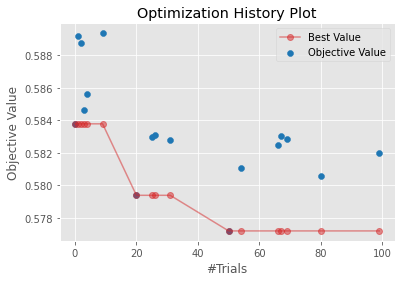

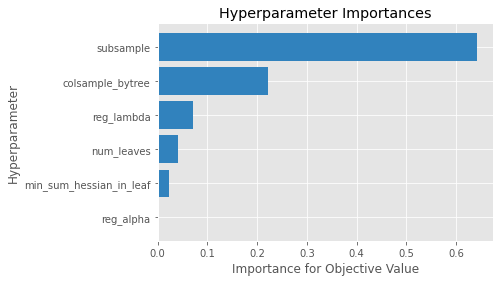

feature_fraction, val_score: inf:   0%|          | 0/7 [1:12:40<?, ?it/s]


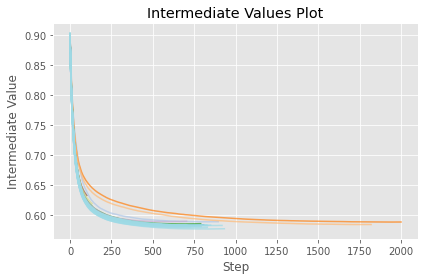

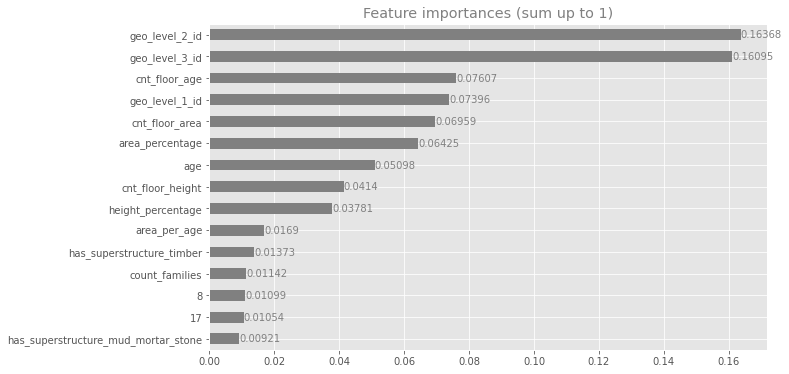


     . Optuna hyperparameters optimization finished
     .. Best trial number:50    |     log_loss:           0.5771902269419521
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:  666   |     multi_logloss:           0.5853108109357379

Time elapsed for fit execution: 49 min 17.366 sec


In [ ]:
from verstack import LGBMTuner
tuner = LGBMTuner(metric="accuracy") # <- the only required argument
y_trainn = y_train.squeeze()
y_trainn = y_trainn.map({1:0,2:1,3:2})
tuner.fit(x_train, y_trainn)

In [ ]:
tuner.best_params

In [ ]:
y_pred = tuner.predict(x_test)

In [ ]:
bestParameters = {
        "objective" : "multiclass",
        "num_class":3,
        "metric" : "multi_error",
        "boosting": 'gbdt',
        "max_depth" : -1,
        "num_leaves" : 30,
        "learning_rate" : 0.1,
        "feature_fraction" : 0.5,
        "min_sum_hessian_in_leaf" : 0.1,
        "max_bin":8192,
        "verbosity" : 1,
        "num_threads":6,
        "seed": 1881
    }

In [ ]:
y_testt = y_test.squeeze()
y_testt = y_testt.map({1:0,2:1,3:2})

In [ ]:
accuracy_score(y_test,y_pred)

0.765383748115973

In [ ]:
f1_score(y_test,y_pred,average ="micro")

0.765383748115973

In [ ]:
y_pred = tuner.predict(x_train)


In [ ]:
f1_score(y_trainn,y_pred,average="micro")

0.8337462997478347

In [ ]:
accuracy_score(y_trainn,y_pred)

0.8337462997478347